In [1]:
import pandas as pd
import matplotlib as plt 

In [2]:
#import CSVs
buy_side = pd.read_csv("buy.csv")
sell_side = pd.read_csv("sell.csv")

#Filter only relevant columns
buy_side = buy_side[["Name of Fund", "Investment Amount", "Date Completed"]]
buy_side["Side"] = "Buy"
sell_side = sell_side[["Name of Fund", "Net Redemption Amount", "Date Completed"]]
sell_side["Side"] = "Sell"

#Extract only the money amount and convert to integer
buy_side["Buy_Amt"] = buy_side["Investment Amount"].str.extract(r"(\d+)").astype('int64')
sell_side["Sell_Amt"] = sell_side["Net Redemption Amount"].str.extract(r"(\d+)").astype('int64')

In [3]:
#group the dfs together and find net p/l

bs_amt = buy_side.groupby(by="Name of Fund").sum()
ss_amt = sell_side.groupby(by="Name of Fund").sum()
net = bs_amt.join(ss_amt,on="Name of Fund")
net["P/L"] = net["Sell_Amt"] - net["Buy_Amt"]

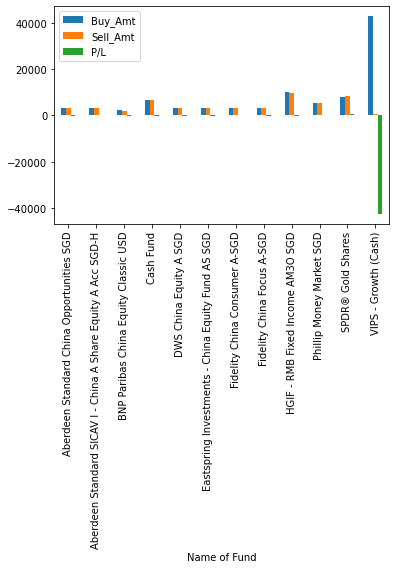

In [6]:
net.plot.bar()